In [1]:
from typing import Union

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from wordcloud import WordCloud


IS_ETHICAL_COLUMN = "is.ethical"
WHY_NOT_ETHICAL_COLUMN = "why.not.ethical"
WHY_NOT_ETHICAL_CLEAN_COLUMN = "why.not.ethical_clean"
WHY_NOT_ETHICAL_CLEAN_WORD_COUNT_COLUMN = "why.not.ethical_clean_word_count"
RISK_1_COLUMN = "Risk 1"

MIN_WORDS_TO_KEEP = 5
MAX_WORDS_TO_KEEP = 50

In [2]:
def read_excel_df(df_path: str) -> pd.DataFrame:
    df = pd.read_excel(df_path)

    # fix excel unicode
    df = df.replace(r'\n',' ', regex=True)
    df = df.replace(r'[^\x00-\x7F]+',  '', regex=True)
    df = df.replace({r"_x([0-9a-fA-F]{4})_": ""}, regex=True)
    return df

def get_clean_text(dirty_text: Union[str, int]) -> str:
    dirty_text = str(dirty_text)
    # clean_text = re.sub(r'[^a-zA-Z0-9./ ]', r'', dirty_text)
    clean_text = " ".join(dirty_text.strip().split())
    return clean_text

def get_relevant_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    not_ethical_with_normal_word_count
    :param df:
    :return: Part of the dataframe that is not ethical, with a normal word count (not too many, and not too little)
    """
    df = df[df["is.ethical"] == False]  # we
    df = df[df[WHY_NOT_ETHICAL_CLEAN_WORD_COUNT_COLUMN] >= MIN_WORDS_TO_KEEP] # we take only real text, and not -99/Attention based on # Counter(df[df[WHY_NOT_ETHICAL_CLEAN_WORD_COUNT] == 1][WHY_NOT_ETHICAL_CLEAN_COLUMN]).most_common()
    df = df[df[WHY_NOT_ETHICAL_CLEAN_WORD_COUNT_COLUMN] <= MAX_WORDS_TO_KEEP] # len(df[df[WHY_NOT_ETHICAL_CLEAN_WORD_COUNT_COLUMN] > 100]), len(df), only a small portion of the data has more than 100 words.
    df = df[~df[RISK_1_COLUMN].isna()] # I checked that when Risk1 does not exist, no other risk exists, which makes na rows irrelevant
    df[RISK_1_COLUMN] = df[RISK_1_COLUMN].str.lower().str.strip()
    # todo: עדיין יש חוסר אחידות בסוגי הסיכונים שהם תייגו אז שווה אולי לאחד ידנית על בסיס מיפוי שנעשה
    # todo: אולי שווה גם להסתכל על Risk 2 למרות שאין שם הרבה
    return df



topic_modeling_df = read_excel_df("/home/amit/Downloads/nlp_project_topic_modeling.xlsx")

topic_modeling_df[WHY_NOT_ETHICAL_CLEAN_COLUMN] = topic_modeling_df.apply(lambda row: get_clean_text(row[WHY_NOT_ETHICAL_COLUMN]), axis=1)

# Create a new column corresponding to the length of each headline
topic_modeling_df[WHY_NOT_ETHICAL_CLEAN_WORD_COUNT_COLUMN] = topic_modeling_df.apply(lambda row: len(row[WHY_NOT_ETHICAL_CLEAN_COLUMN].split()), axis=1)

topic_modeling_df = get_relevant_df(topic_modeling_df)
topic_modeling_df.columns

Index(['עמודה', 'app', 'law', 'country', 'prolific_id', 'age', 'gender',
       'tounge', 'English.proficiency', 'Legal.education', 'Legal.Experience',
       'app_description', 'paragraph', 'paragraph.title', 'is.ethical',
       'why.not.ethical', 'Manual Classification', 'Comment', 'Risk 1',
       'Risk 2', 'Risk 3', 'Risk 4', 'New risk', 'why.not.ethical_clean',
       'why.not.ethical_clean_word_count'],
      dtype='object')

In [5]:
Counter(topic_modeling_df[RISK_1_COLUMN]).most_common()

[('dp&p uninformed consent', 1264),
 ('onesided terms', 1172),
 ('collection of personal data', 526),
 ('other limitation of liability', 477),
 ('third party data transfers', 457),
 ('limited readability', 417),
 ('limitation of liability', 259),
 ('unfair terms', 239),
 ('storage and retention of personal data', 207),
 ('user content ownership', 187),
 ('data security', 176),
 ('uninformed consent', 159),
 ('tracking user information', 143),
 ('no refunds', 143),
 ('restricting user legal action - general', 141),
 ('dispute resolution clause', 125),
 ('limiting class action', 102),
 ('burdens associated with using the app - general', 57),
 ('international data transfers', 57),
 ('financial risks - general', 52),
 ('legally non compliant', 49),
 ('privacy risks', 46),
 ('processing user information', 44),
 ('eliminating or limiting access to purchased app assets or coins', 38),
 ('in app payments', 33),
 ('advertisements and spam', 32),
 ('severability', 25),
 ('functionality', 21),
 (

In [9]:
topic_modeling_df[WHY_NOT_ETHICAL_CLEAN_COLUMN].sample(5)

18235    They can share your personal data without tell...
23553    Data is only reasonably kept for use of the ap...
14535    unethical to collect information from networki...
28051    Zynga have waived liability in relation to all...
21151    They can't guarantee the security of the data ...
Name: why.not.ethical_clean, dtype: object

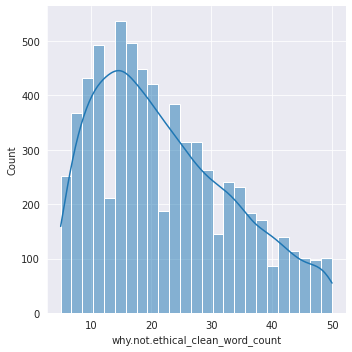

In [10]:
sns.displot(topic_modeling_df[WHY_NOT_ETHICAL_CLEAN_WORD_COUNT_COLUMN], kde=True) # we can choose min and max word count based on this graph

In [11]:
why_not_ethical_text = " ".join(topic_modeling_df[WHY_NOT_ETHICAL_CLEAN_COLUMN])
why_not_ethical_text_words = why_not_ethical_text.split()

In [12]:
Counter(why_not_ethical_text_words).most_common()

[('to', 6660),
 ('the', 6344),
 ('is', 3682),
 ('be', 3477),
 ('of', 2871),
 ('not', 2621),
 ('and', 2525),
 ('should', 2401),
 ('a', 2045),
 ('they', 1992),
 ('that', 1964),
 ('for', 1858),
 ('data', 1663),
 ('it', 1496),
 ('in', 1319),
 ('information', 1297),
 ('It', 1282),
 ('unethical', 1239),
 ('you', 1223),
 ('or', 1180),
 ('are', 1140),
 ('your', 1139),
 ('have', 1096),
 ('their', 1093),
 ('any', 986),
 ('if', 983),
 ('as', 945),
 ('The', 941),
 ('user', 873),
 ('personal', 856),
 ('with', 853),
 ('can', 838),
 ('this', 832),
 ('They', 802),
 ('without', 734),
 ('on', 711),
 ('will', 675),
 ('users', 642),
 ('may', 641),
 ('company', 601),
 ('This', 555),
 ('from', 550),
 ('use', 546),
 ('no', 535),
 ('third', 526),
 ('an', 524),
 ('I', 520),
 ('which', 519),
 ('by', 486),
 ('what', 471),
 ('app', 440),
 ('at', 434),
 ('able', 432),
 ('other', 422),
 ('terms', 416),
 ('do', 412),
 ('does', 400),
 ('because', 392),
 ('access', 378),
 ('all', 377),
 ('game', 374),
 ('account', 362

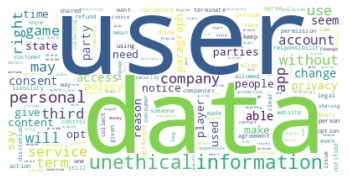

In [14]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(why_not_ethical_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()